Chapter 20 of A guided tour of mathematical methods for the physical sciences deals with Potential Methods. These methods deal with (vector) fields that let themselves be described by (scalar) potentials. For example, the gravitational field due to the Earth's mass can be described by a potential $V$, so that the gravitional field is $$\mathbf{g} = -\nabla V.$$

In Chapter 6, we learned that the gravitational field at position $\mathbf{r}$ in a medium with density $\rho$ is 
\begin{equation} 
\nabla\cdot\mathbf{g}(\mathbf{r}) = -4\pi G\rho(\mathbf{r}).
\label{eq:g}
\end{equation}

Combining these equations, we find that the potential $V$ satisifies Laplace's equation:
$$ \nabla^2 V(\mathbf{r}) = 4\pi G\rho(\mathbf{r}),$$
the topic of Chapter 20. Let us illustrate the solutions for the gravitational acceleration with an application to gravity on/in/over the Earth.

The gravitational acceleration -- or the magnitude of the gravitational field -- due to a point mass $M$ is
$$g = \frac{G M}{r^2}:$$ 

In [2]:
def g(m,r):
    return G*m/r**2

It turns out (see Chapters 6 and 8) that this is also the right expression outside ($r \ge R$) any finite spherically symmetric mass $M$. So let's explore gravity and Earth, by first defining some constants in SI units: 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
from scipy import interpolate

rho = 5510 # The average density of the Earth in kg/m^3
R = 6371*10**3 # The approximate average radius the Earth in m
G = 6.67*10**(-11) # The Gravitational constant in m^3 s^(-2) kg^-1

For a mass M of radius $R$, the gravitational acceleration for $r \ge R$ is

<IPython.core.display.Javascript object>


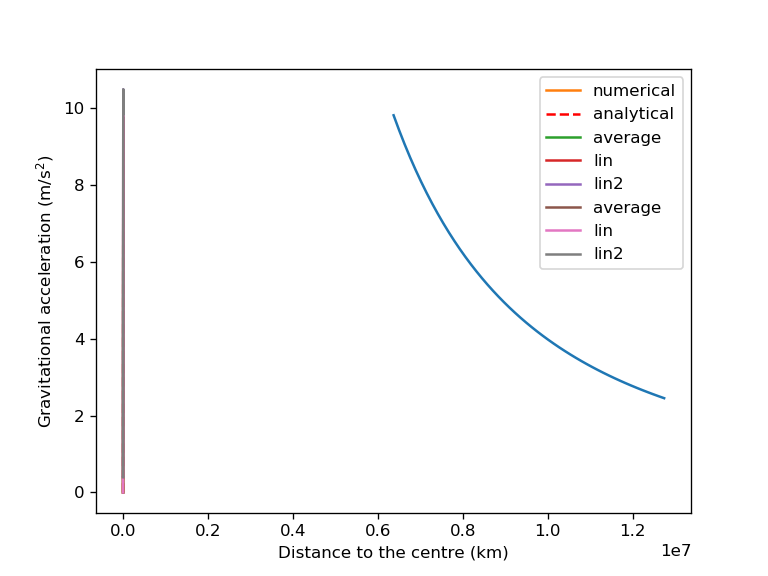

In [6]:
rs_out = np.linspace(R,2*R)
M = 4*np.pi*R**3*rho/3
g_out = g(M,rs_out)
plt.plot(rs_out,g_out)
plt.xlabel('Distance to the centre (km)')
plt.ylabel('Gravitational acceleration (m/s$^2$)')
plt.show()

Now let us consider the gravitational acceleration as we decend into a homogeneous sphere with (total) mass M. From the Theorem of Gauss in Chapter 8, we learned that only mass from the centre to the observer contributes to the acceleration. 
We can calculate the mass below each position in the Earth and determine its contribution to the gravitational acceleration:

In [7]:
rs = np.linspace(1,R,num=200) # skipping r=0, to avoid a warning by python about dividing by zero to get g. 
m_in = (4/3)*np.pi*rho*rs**3
g_in = g(m_in,rs)

For this case, we also derived an analytic expression in equation 8.7 of Chapter 8: $$ g = \frac{GMr}{R^3},$$
where $r\le R$:

In [8]:
g_in2 = G*M*rs/R**3

Just to be sure, let us compare the answers in a figure:

In [9]:
plt.plot(rs/1000,g_in,label='numerical')
plt.plot(rs/1000,g_in2,'r--',label='analytical')
plt.xlabel('Distance to the centre (km)')
plt.ylabel('Gravitational acceleration (m/s$^2$)')
plt.legend()
plt.show()

Gravity is zero at the centre and increases linearly for a sphere with a constant density. 
### Homework
The same way we derived the analytic expression for the gravitational acceleration inside a sphere with constant density, show that the analytic solution
for a linear density profile is:
$$g(r) = 4\pi G \left(\frac{ar}{3}+\frac{br^2}{4}\right)$$

Now we pick things up one notch. Most rocks you can find outside have a density of less than 3000 kg per cubic metre. However, it was Cavendish who figured out that the mass of the Earth is on the order of $6\times 10^{24}$ kg. (This means the average density of the Earth is around 5510 kg per cubic metre!) To better honour the Earth's density profile, let's assume it is linear, with density of 2500 kg per cubic metre at the surface, then increasing linearly to match the total mass of the Earth:
$$ \rho(r) = ar+b,$$
where we have two boundary conditions: 

$\rho(R) = 2500$ and $\int_0^R\rho(r)dr= M$, then:

In [10]:
rhoR= 2500
a = (12/R)*(rhoR/3-M/(4*np.pi*R**3))
b= rhoR-a*R
lin_rhos = b+ a*rs # is an array of equally spaced values that are on this linear density profile

In [11]:
g_lin = 4*np.pi*G*((b*rs)/3+(a*rs**2)/4)

Or compute the mass under each point $r$ and determine the gravitational acceleration due to this mass. We do this by summing the contributions of shells with a constant density:

In [12]:
def gravity(ii,rhos):
    M=0
    dr = rs[1]-rs[0]
    # find mass inside rs[ii]:
    for i in range(0,ii+1): 
        M += dr*4*np.pi*rhos[i]*rs[i]**2
    return g(M,rs[ii])

Compute the gravitational acceleration for each mass under a radius $r$:

In [13]:
g_lin2 = []
for i in range(len(rs)):
    g_lin2.append(gravity(i,lin_rhos))

And let's compare the two ways of computing the gravitational acceleration for a linear density distribution in a sphere:

<IPython.core.display.Javascript object>


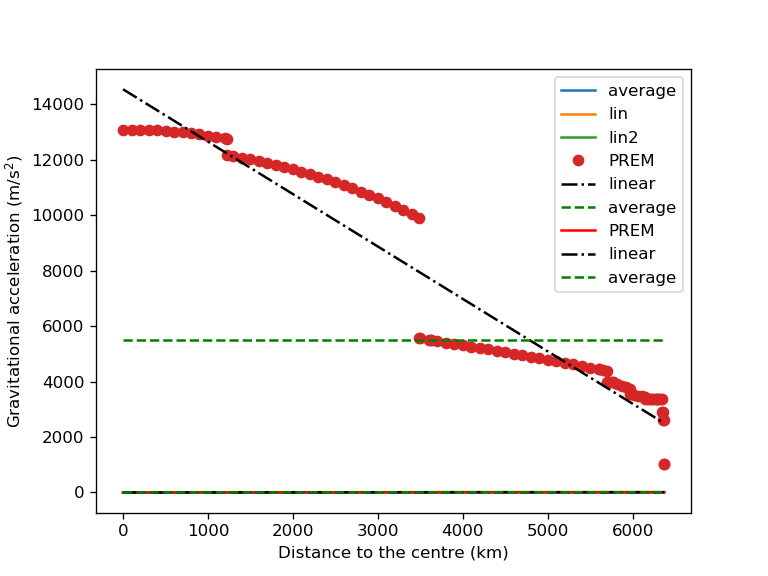

In [16]:
plt.figure()
plt.plot(rs/1000,g_in,label='average')
plt.plot(rs/1000,g_lin,label='lin')
plt.plot(rs/1000,g_lin2,label='lin2')
plt.xlabel('Distance to the centre (km)')
plt.ylabel('Gravitational acceleration (m/s$^2$)')
plt.legend()
plt.show()

Now the gravitational acceleration is still zero at the centre of the Earth, but increases faster than for an Earth of constant density. Both models "predict" the gravitational acceleration we roughly find everywhere at the surface of the Earth. It is just that the model with the linear increase in density with depth honours what Cavendish learned about the Earth's mass/density. One more step: from seismic wavespeed measurements, we can say even more about the density in the Earth. How, is one of the topics of our stage 3 Solid Earth Geophysics course, but here's an estimate of the best radial model of density of the Earth:  

In [17]:
url="http://ds.iris.edu/files/products/emc/data/PREM/PREM_ANISOTROPIC.csv"
c=pd.read_csv(url, usecols=[0,1], names=['radius', 'density'], header=None)
prem_rhos = c['density']
prem_rs = c['radius']
plt.plot(prem_rs/1000,prem_rhos,'o',label='PREM')
plt.plot(rs/1000,lin_rhos,'-.k',label='linear')
mean_rhos = 5510*np.ones(len(rs))
plt.plot(rs/1000,mean_rhos,'--g',label='average')
plt.ylabel('Density (kg/m$^3$)')
plt.xlabel('Distance to the centre (km)')
plt.legend()
plt.show()

Note that generally density increases with depth, but there is a large jump from the rocky mantle to the iron core. 

To determine the gravitational acceleration everywhere in an Earth with such an irregular density distribution, we are going to numerically integrate (sum) shells of constant density again. First, we'll create an earth that honours this model, but with regularly spaced shells, and we'll plot our three density models:

In [18]:
f = interpolate.interp1d(prem_rs, prem_rhos)
rhos = f(rs)

Estimating $g(r)$ and plotting the results:

<IPython.core.display.Javascript object>


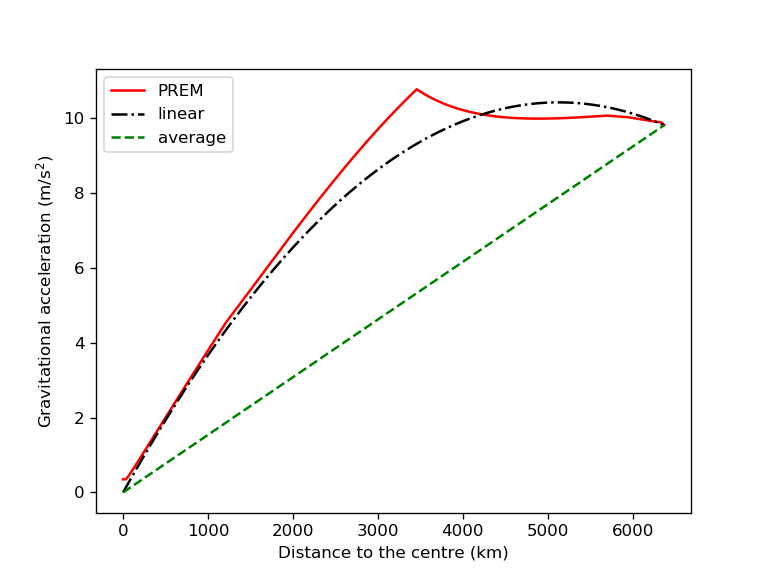

In [20]:
g_prem = []
for i in range(0,len(rs)):
    g_prem.append(gravity(i,rhos))
plt.figure()    
plt.plot(rs/1000,g_prem,'r',label='PREM')
plt.plot(rs/1000,g_lin,'-.k',label='linear')
plt.plot(rs/1000,g_in,'--g',label='average')
plt.legend()
plt.xlabel('Distance to the centre (km)')
plt.ylabel('Gravitational acceleration (m/s$^2$)')
#plt.savefig('g_inside.pdf')
plt.show()

We can now clearly see the imprint on the gravitational acceleration of the jump in density between the mantle and the core, in particular. 

### Variations on spherical symmetry in the Earth
However, the Earth is heterogeneous and NOT (quite) spherically symmetric. Below is a result from the GRACE mission (figure from wikipedia), showing that variations in $g$ from this best fitting ellipsoid:
![GRACE.jpg](https://upload.wikimedia.org/wikipedia/commons/5/56/Geoids_sm.jpg)

The topography and colours look dramatic, but the scale means the Earth's density varies on the order 100 mGal or 1 mm/s$^2$. On an absolute value of almost 10 m/$s^2$, variations on our spherical models are (only) on the order of 1 part in 10000. Still, these variations allow Geophysicists to explain features in the subsurface related to tectonic plates, resources, and other geologic features.